This notebook is for visualizing the new TF-Modisco results for ZF1 from CTCF.

In [1]:
# Import necessary dependencies

%matplotlib inline
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


2.7.15 |Anaconda custom (64-bit)| (default, Dec 14 2018, 19:04:19) 
[GCC 7.3.0]


Save and print the results.

Metaclusters heatmap


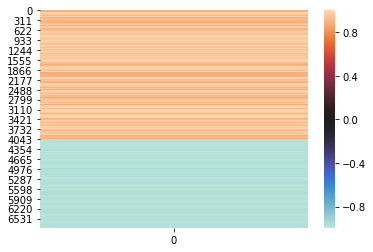

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 859
Task 0 hypothetical scores:


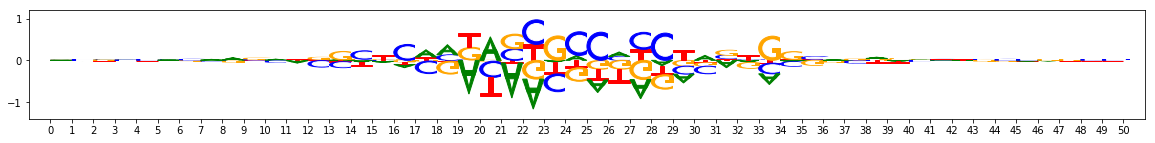

Task 0 actual importance scores:


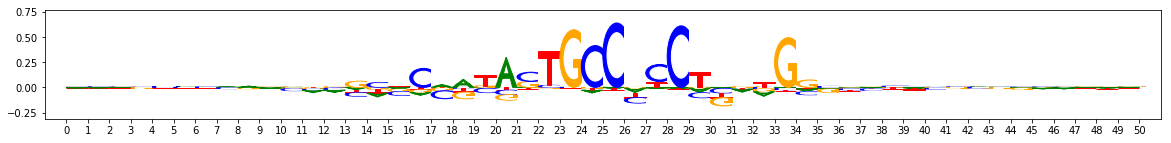

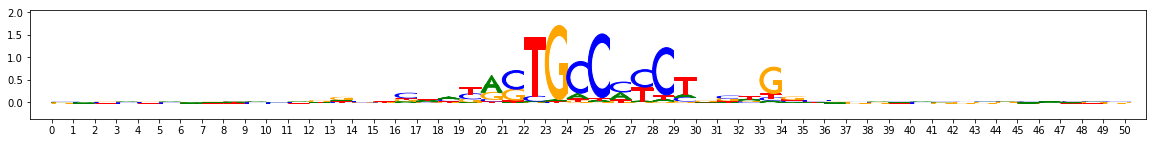

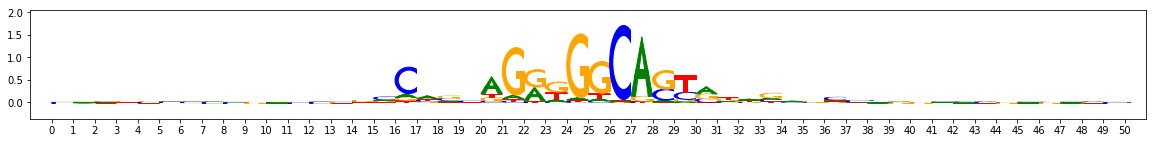

metacluster_0 pattern_1
total seqlets: 544
Task 0 hypothetical scores:


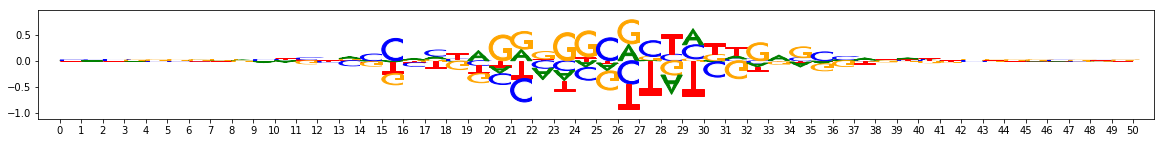

Task 0 actual importance scores:


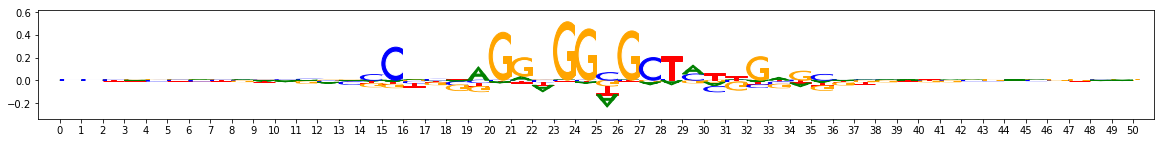

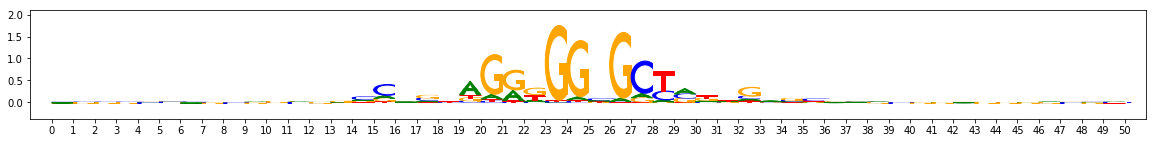

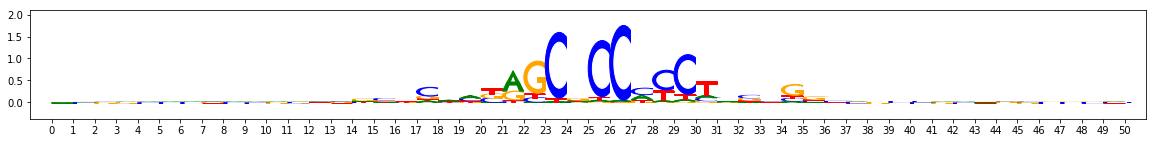

metacluster_0 pattern_2
total seqlets: 84
Task 0 hypothetical scores:


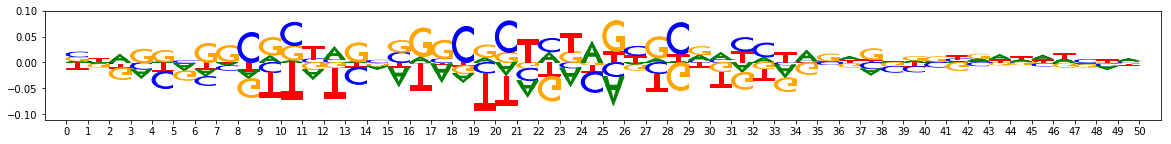

Task 0 actual importance scores:


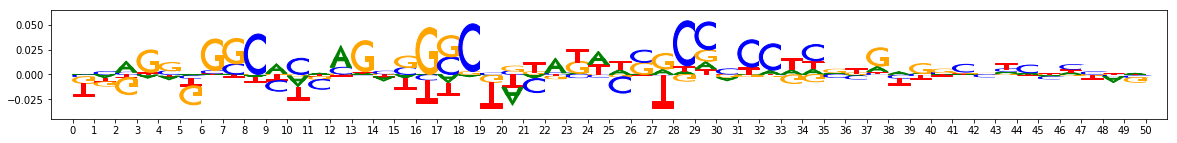

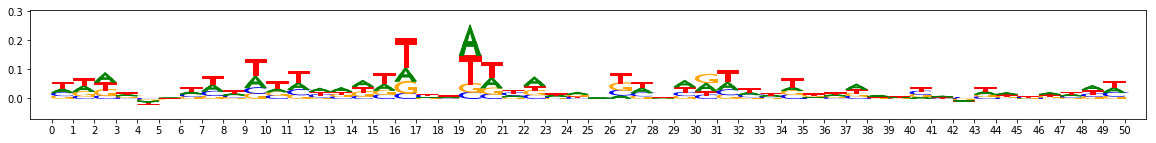

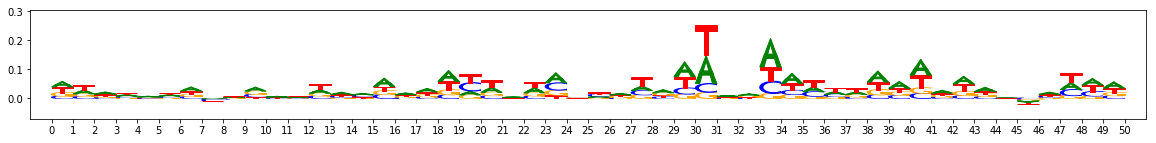

metacluster_0 pattern_3
total seqlets: 75
Task 0 hypothetical scores:


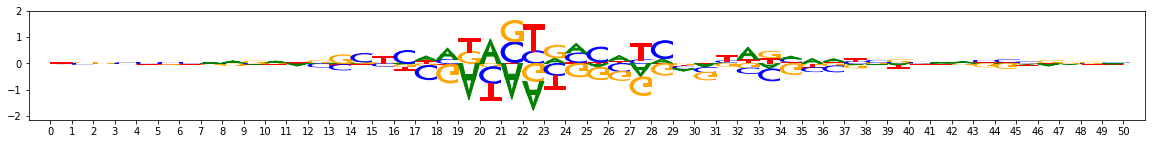

Task 0 actual importance scores:


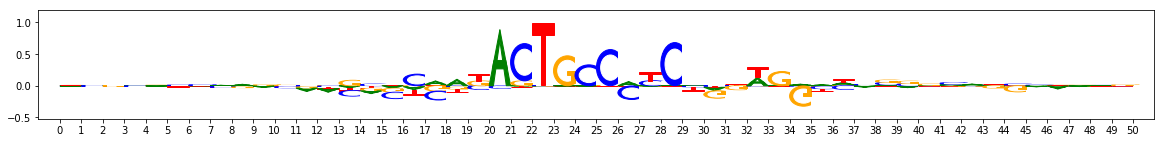

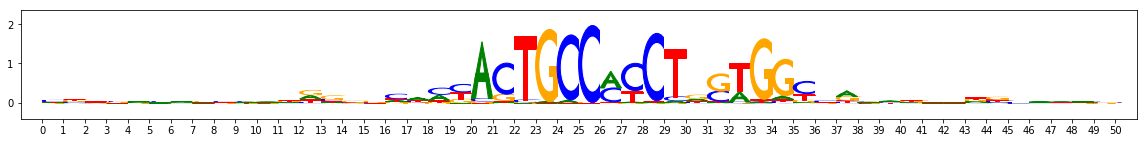

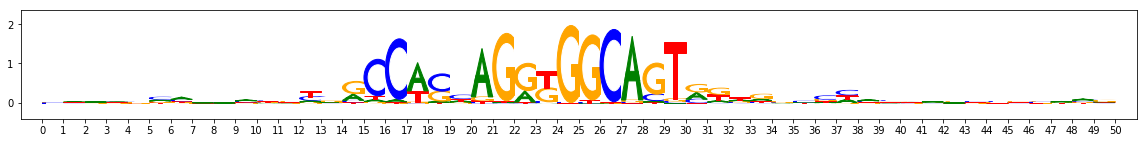

metacluster_0 pattern_4
total seqlets: 53
Task 0 hypothetical scores:


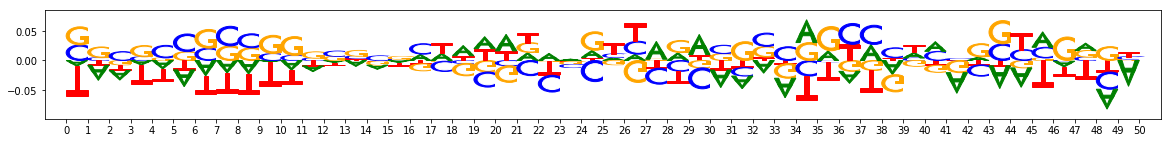

Task 0 actual importance scores:


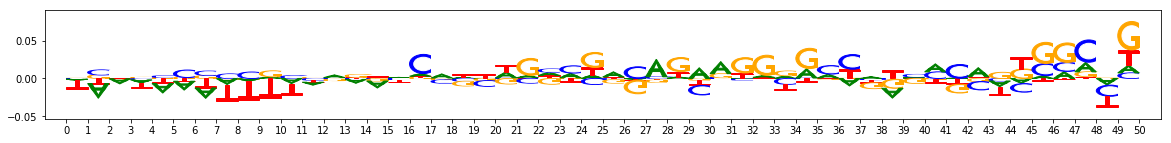

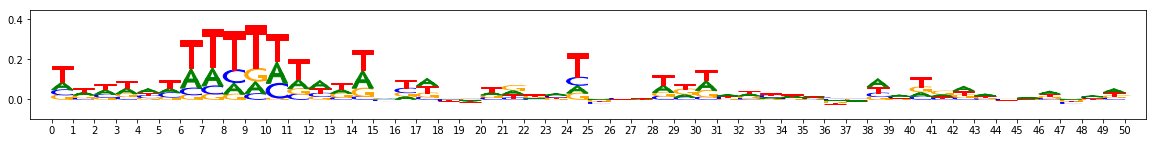

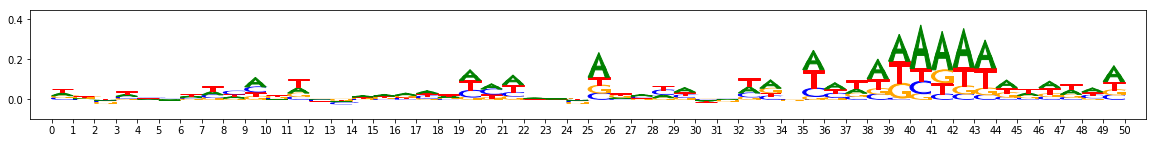

metacluster_0 pattern_5
total seqlets: 37
Task 0 hypothetical scores:


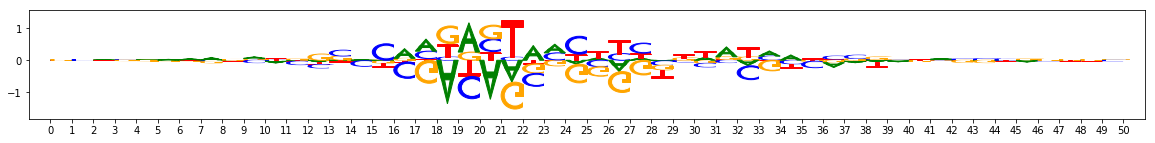

Task 0 actual importance scores:


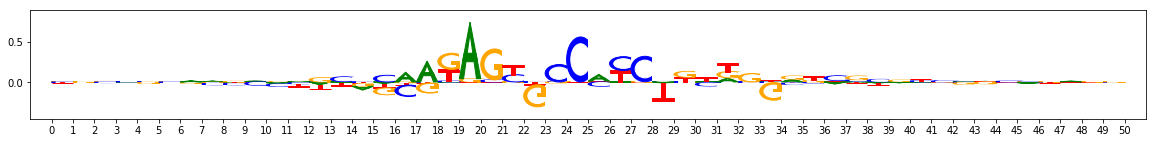

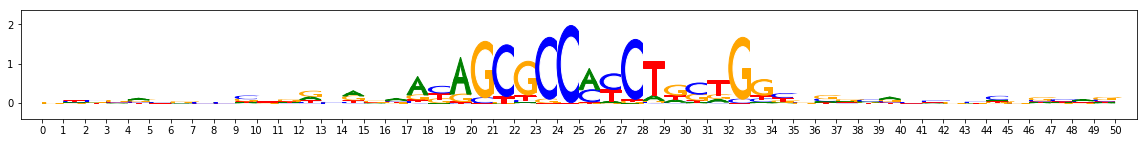

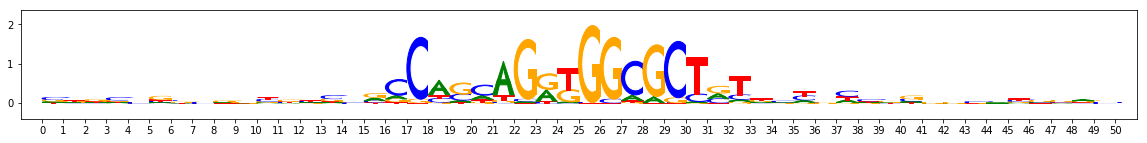

metacluster_0 pattern_6
total seqlets: 28
Task 0 hypothetical scores:


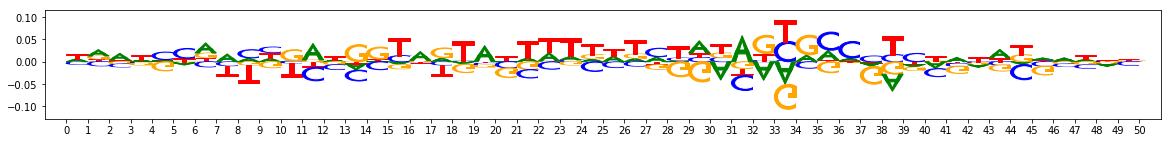

Task 0 actual importance scores:


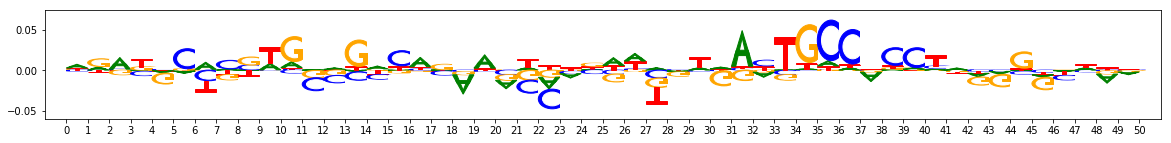

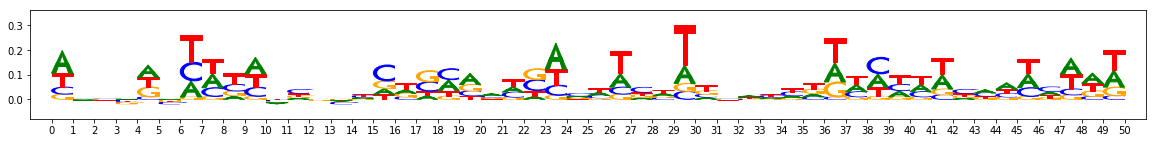

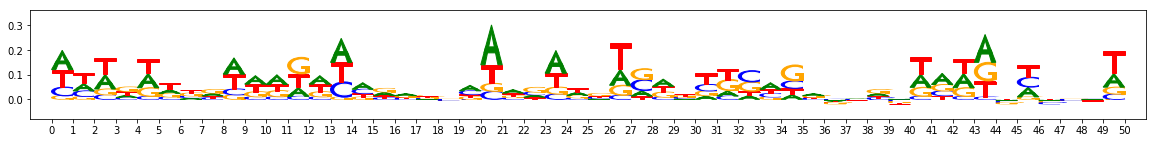

metacluster_0 pattern_7
total seqlets: 30
Task 0 hypothetical scores:


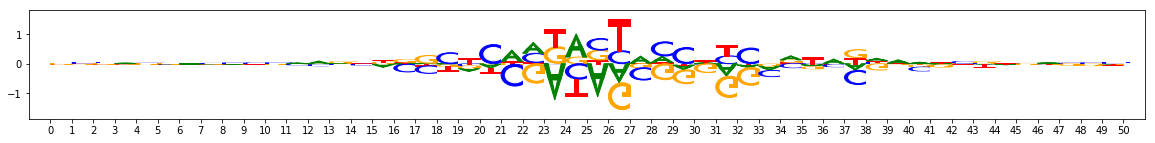

Task 0 actual importance scores:


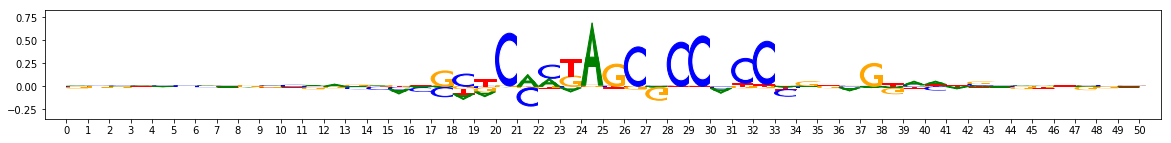

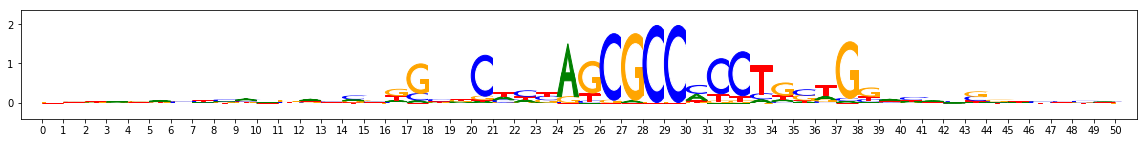

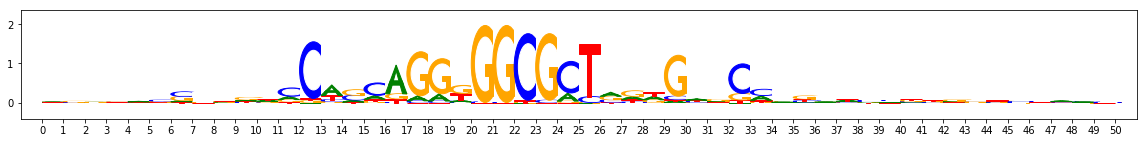

metacluster_0 pattern_8
total seqlets: 32
Task 0 hypothetical scores:


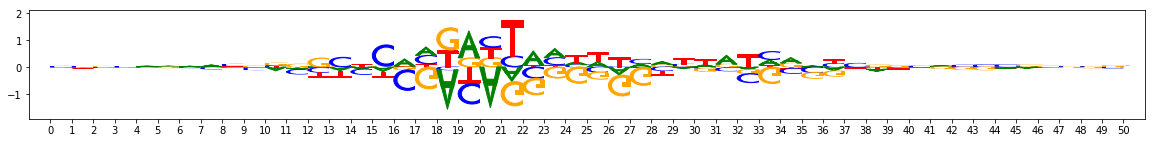

Task 0 actual importance scores:


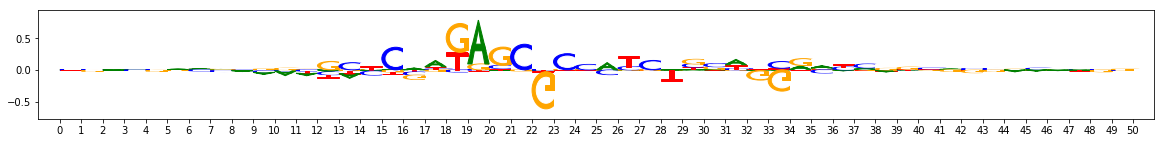

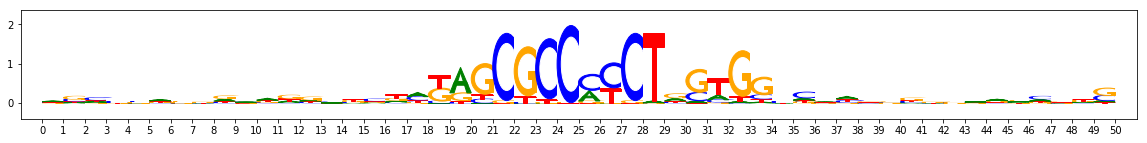

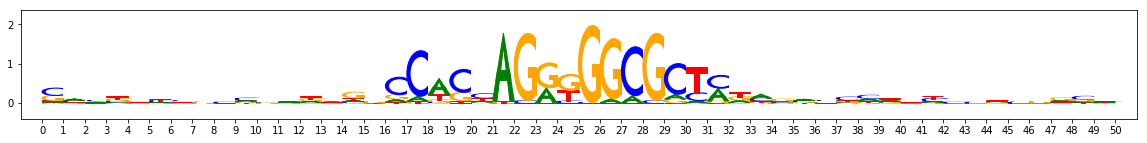

metacluster_0 pattern_9
total seqlets: 36
Task 0 hypothetical scores:


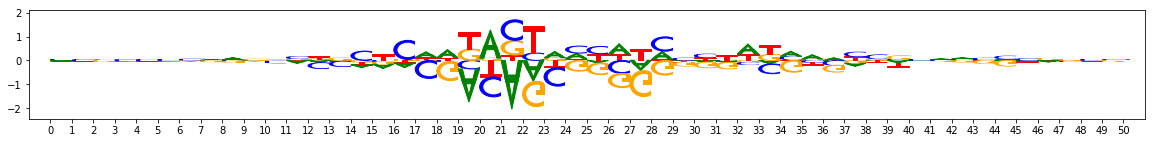

Task 0 actual importance scores:


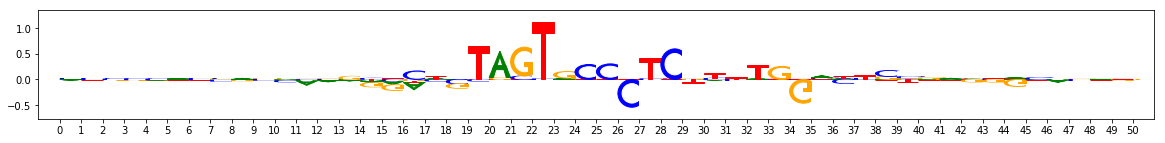

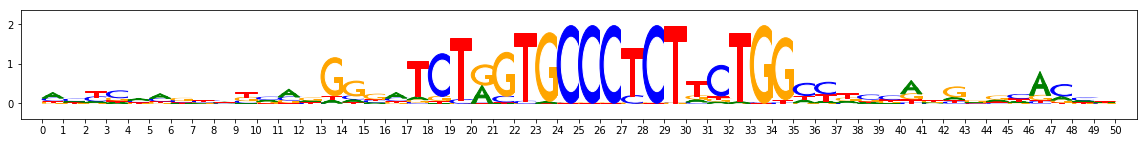

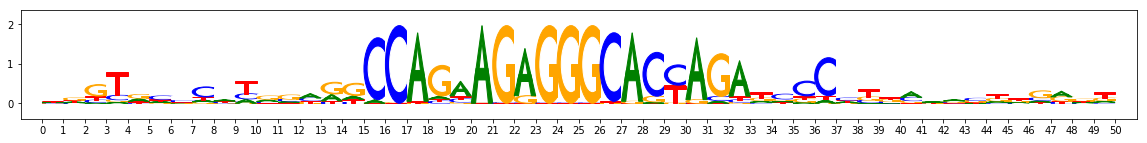

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 276
Task 0 hypothetical scores:


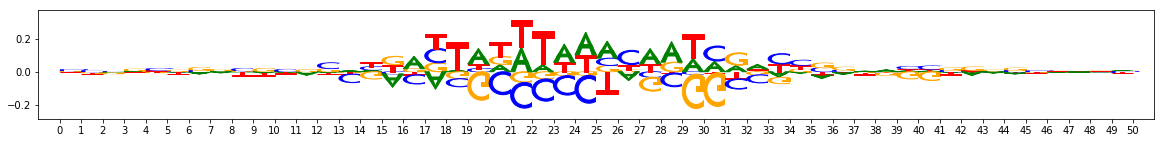

Task 0 actual importance scores:


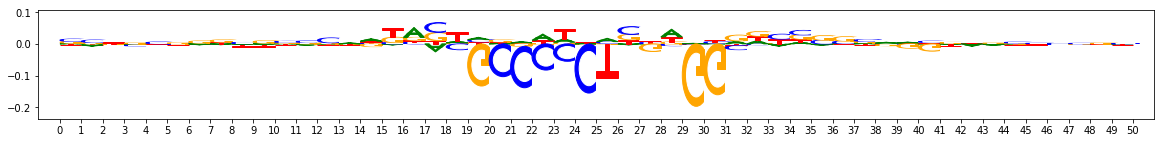

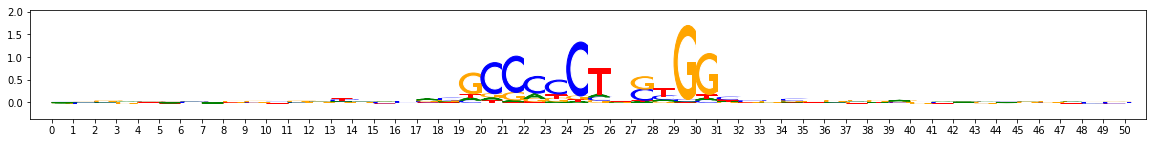

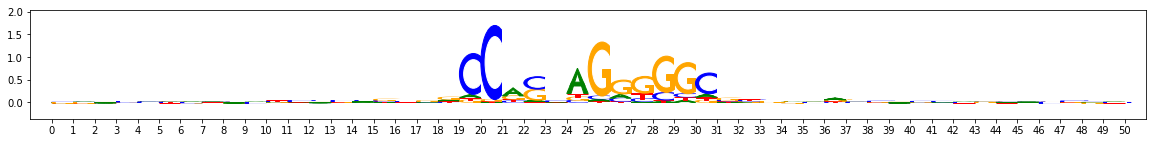

metacluster_1 pattern_1
total seqlets: 193
Task 0 hypothetical scores:


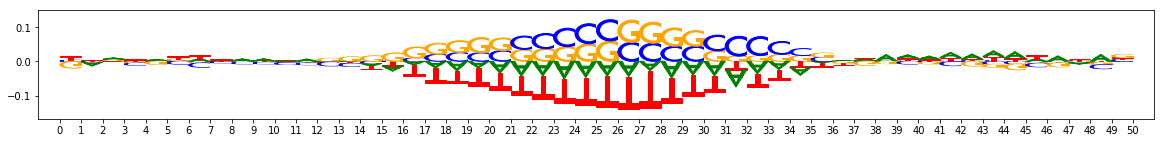

Task 0 actual importance scores:


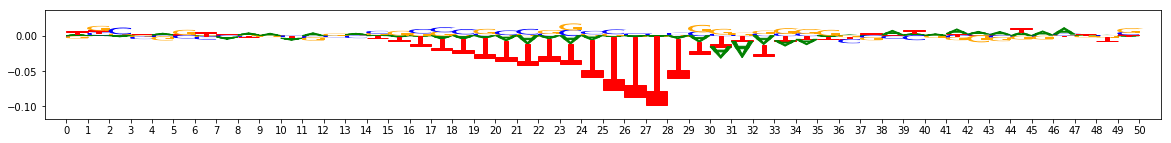

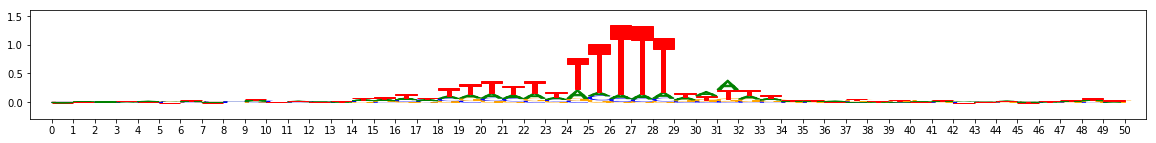

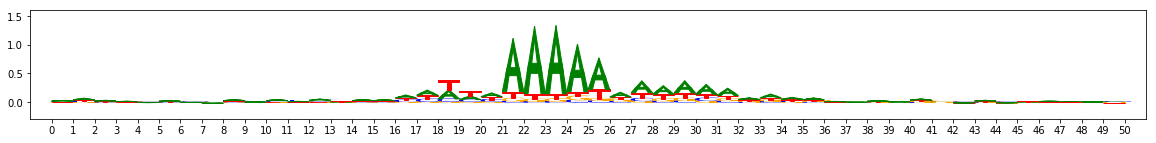

metacluster_1 pattern_2
total seqlets: 120
Task 0 hypothetical scores:


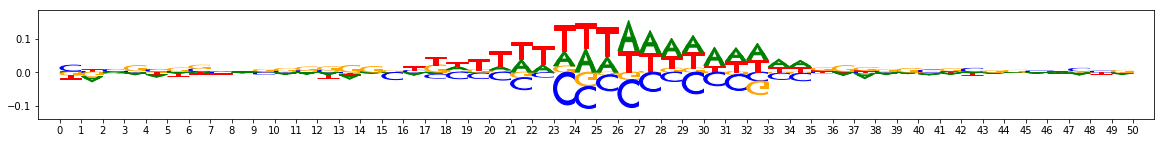

Task 0 actual importance scores:


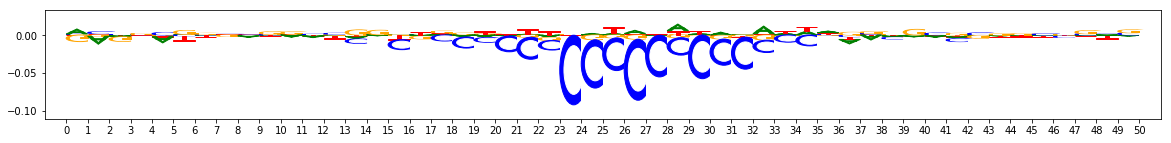

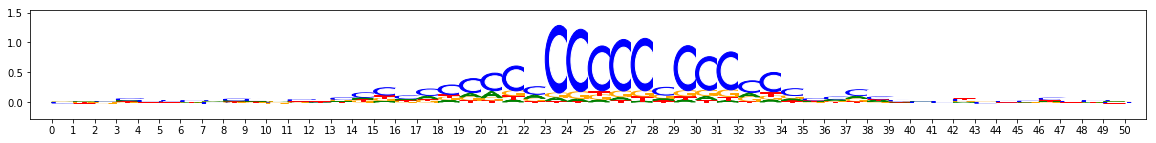

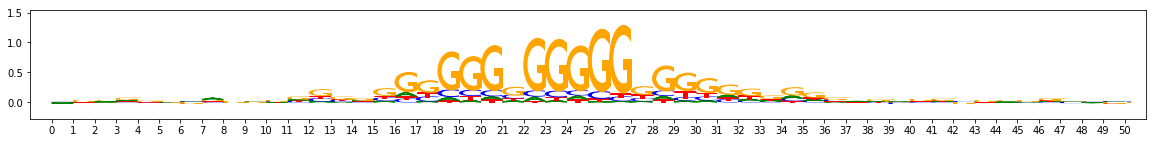

In [2]:
import h5py
import modisco.util
reload(modisco.util)

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("CTCFZF2_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.28, 0.21, 0.21, 0.28])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 859
Task 0 hypothetical scores:


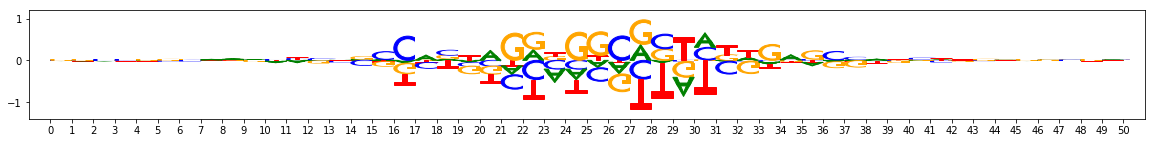

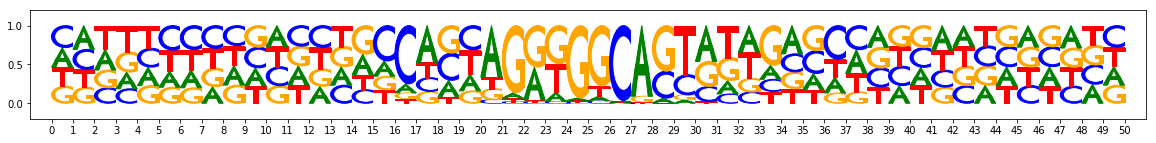

[[ -2.67226907e-03   5.99546003e-03   9.10569127e-03  -1.96142071e-03]
 [ -5.51889613e-03   7.25858244e-03   8.84044037e-03  -3.60507687e-03]
 [ -6.25174335e-03   1.24097525e-02   3.03542262e-03  -3.22858618e-03]
 [  1.58853714e-04   1.63441441e-02   2.98006172e-03  -1.41603969e-02]
 [ -6.26205323e-03   4.65064401e-03   1.58484189e-02  -9.91538197e-03]
 [  2.08574122e-03  -1.90888584e-02   2.14926995e-02  -2.22419719e-03]
 [  8.11545338e-03  -1.89421620e-02   1.07017843e-02   2.13893662e-03]
 [  1.12124020e-02   4.10401314e-03   2.32346401e-03   6.48712882e-03]
 [  1.23020255e-02   6.30132336e-03   9.75258905e-03   6.77053685e-03]
 [  1.62333410e-02  -3.96479193e-03  -1.99490044e-02   1.46233012e-03]
 [ -3.64551401e-02   1.67245555e-02  -2.92272576e-03  -1.77367828e-02]
 [ -5.77147999e-02   2.78376675e-02   1.69116673e-02   3.13763638e-02]
 [ -1.31559812e-02   1.69481294e-02  -5.48676370e-02   1.28337327e-02]
 [ -1.24564398e-02  -1.39924910e-02  -1.29108797e-02   1.57133914e-02]
 [  1.

In [4]:
# Get the PFM with the most seqlets

hdf5_results = h5py.File("CTCFZF2_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[0]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.28, 0.21, 0.21, 0.28])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["rev"])
    viz_sequence.plot_weights(pattern["sequence"]["rev"])
    print(np.array(pattern["task0_hypothetical_contribs"]["rev"]))
    print(np.array(pattern["sequence"]["rev"]))
        
hdf5_results.close()